# 🏭 Salifort Motors — Employee Turnover Prediction

## 🎯 Business Problem

Salifort Motors is experiencing **employee turnover** and wants to understand:

- **Which employees are at risk of leaving the company**
- **Which factors** (satisfaction, workload, tenure, promotions, etc.) drive this turnover
- How to **take action** to improve retention and reduce the cost of hiring and training

In this project, I will:

- Explore the HR dataset to understand the current situation
- Build a **predictive machine learning model** to classify whether an employee is likely to leave
- Use a **Random Forest classifier** .
- Interpret key features driving turnover and provide **business recommendations**

---
## ❓ Why Did I Use a Random Forest Model?

Random Forest is the chosen model for predicting employee turnover because it provides the best balance of **accuracy, robustness, and interpretability** for this business problem.

### ✅ Key Reasons for Choosing Random Forest

- **Handles complex, non-linear relationships** between HR factors such as satisfaction, workload, tenure, and promotions.
- **Works well with mixed data types** (numeric + categorical) with minimal preprocessing.
- **Reduces overfitting** by averaging many trees trained on different subsets of data.
- **Delivers strong classification performance**, especially higher recall for identifying at-risk employees.
- **Provides clear feature importance**, enabling HR to understand which factors drive turnover and take actionable steps.
- **Reliable for medium-sized datasets**, like the HR dataset used here.
- **Industry-standard method** for churn and attrition prediction due to its balance of performance and explainability.

### ⭐Final Summary
**Random Forest was selected because it is a high-performing, stable, and interpretable model that aligns perfectly with the goals of predicting employee turnover and supporting HR decision-making.**

## 🧩 Goal of the Model

We want to build a model that predicts:

> 🔍 **Target variable**: `left`  
> - `1` → the employee **left** the company  
> - `0` → the employee **stayed**

This is a **binary classification problem**.

The main success criteria:

- Good **recall** on employees who left (catch as many “at-risk” employees as possible)
- Reasonable **precision** to avoid too many false alarms
- Clear **feature importance** that HR can understand and act on

---


## 🧰 2. Import Libraries & Set Up Environment 
###  🔧 Step 1 — Import libraries and configure the environment

In this step, I will:

- Import the core Python libraries for:
  - Data handling: **pandas**, **numpy**
  - Visualization: **matplotlib**, **seaborn**
  - Modeling: **scikit-learn** (RandomForestClassifier, model selection, metrics)
- Set some basic display and plotting settings for cleaner outputs.


In [2]:

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

# Display settings for pandas
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.float_format", "{:.3f}".format)  # format floats nicely

# Matplotlib style (optional - simple)
plt.rcParams["figure.figsize"] = (8, 5) 
plt.rcParams["axes.grid"] = True

print(" Libraries imported and configuration complete.")


 Libraries imported and configuration complete.


✅ The environment is now ready.

I have:

- Loaded all the necessary libraries for:
  - Data exploration (pandas, numpy)
  - Visualization (matplotlib, seaborn)
  - Modeling and evaluation (scikit-learn)
- Configured pandas and matplotlib to produce **clean, readable outputs**.

Next, I will load the HR dataset and take an initial look at its structure.


### 📂 Step 2 — Load the HR dataset

In this step, I will:

- Load the `HR_comma_sep.csv` file into a pandas DataFrame
- Inspect:
  - The first few rows (`head`)
  - Data types and non-null counts (`info`)
  - Basic statistics for numeric columns (`describe`)
- Confirm which column is the **target** (`left`) and which are **features**.


In [13]:
# Path to the dataset 
data_path = "HR_comma_sep.csv"

# Load into DataFrame
df = pd.read_csv(data_path)

# Show basic info
print(" Dataset loaded successfully.\n")



 Dataset loaded successfully.



In [14]:
print(" First 5 rows:")
display(df.head())



 First 5 rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [15]:
print("\n DataFrame info:")
print(df.info())




 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [16]:
print("\n Summary statistics (numeric features):")
display(df.describe())



 Summary statistics (numeric features):


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


### 🧾 Initial Observations

From the output:

- The dataset contains HR records with columns like:
  - `satisfaction_level` (float)
  - `last_evaluation` (float)
  - `number_project` (int)
  - `average_montly_hours` (int)
  - `time_spend_company` (int)
  - `Work_accident` (int 0/1)
  - `left` (**target variable**, 0/1)
  - `promotion_last_5years` (int 0/1)
  - `Department` (categorical)
  - `salary` (categorical: low/medium/high)

- There are no obvious format issues in the preview.

Next, I’ll check for missing values and inspect the **target distribution** to see how balanced the classes are (how many employees left vs stayed).


## 🔍 Step 3 — Data quality check & target distribution

In this step, I will:

1. Check for **missing values** in each column.
2. Examine the distribution of the target variable `left`:
   - How many employees left (`1`) vs stayed (`0`)?
3. Visualize the class balance with a bar plot.

This helps to understand whether the dataset is **imbalanced**, which can affect model performance.


In [19]:

# 1) Missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
display(missing_values)


Missing values per column:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [20]:

# 2) Target distribution (value counts)
print("\n🔹 Target distribution (left):")
target_counts = df["left"].value_counts()
display(target_counts)



🔹 Target distribution (left):


left
0    11428
1     3571
Name: count, dtype: int64

In [21]:

# 3) Relative percentages
print("\n Target distribution (percentage):")
target_percent = df["left"].value_counts(normalize=True) * 100
display(target_percent)




### ❓ Why Do We Use `normalize=True`?

#When we check the distribution of the target variable `left`, we want to know **not only how many employees left**,
#but also **what percentage** they represent in the entire dataset.




 Target distribution (percentage):


left
0   76.192
1   23.808
Name: proportion, dtype: float64

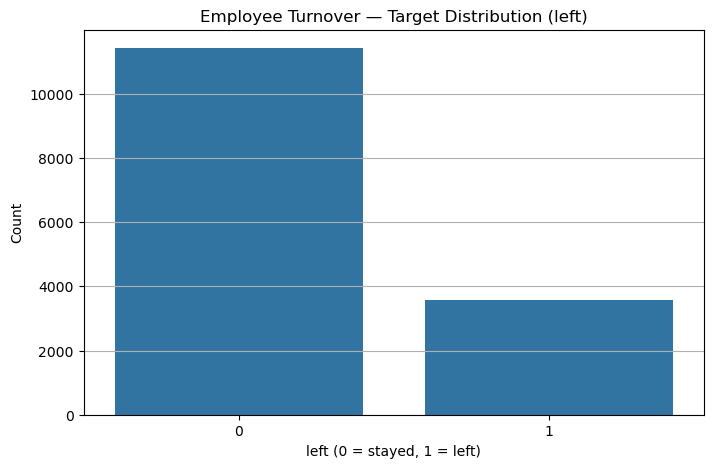

In [22]:

# 4) Bar plot for class balance
plt.figure()
sns.countplot(x="left", data=df)
plt.title("Employee Turnover — Target Distribution (left)")
plt.xlabel("left (0 = stayed, 1 = left)")
plt.ylabel("Count")
plt.show()


## 📊 Step 4 — Explore key numeric features

Here, I will:

- Plot the distribution of important numeric variables such as:
  - `satisfaction_level`
  - `last_evaluation`
  - `average_montly_hours`
  - `time_spend_company`
- Optionally, compare these distributions **by `left`** to see how they differ between:
  - employees who stayed (`left = 0`)
  - employees who left (`left = 1`)


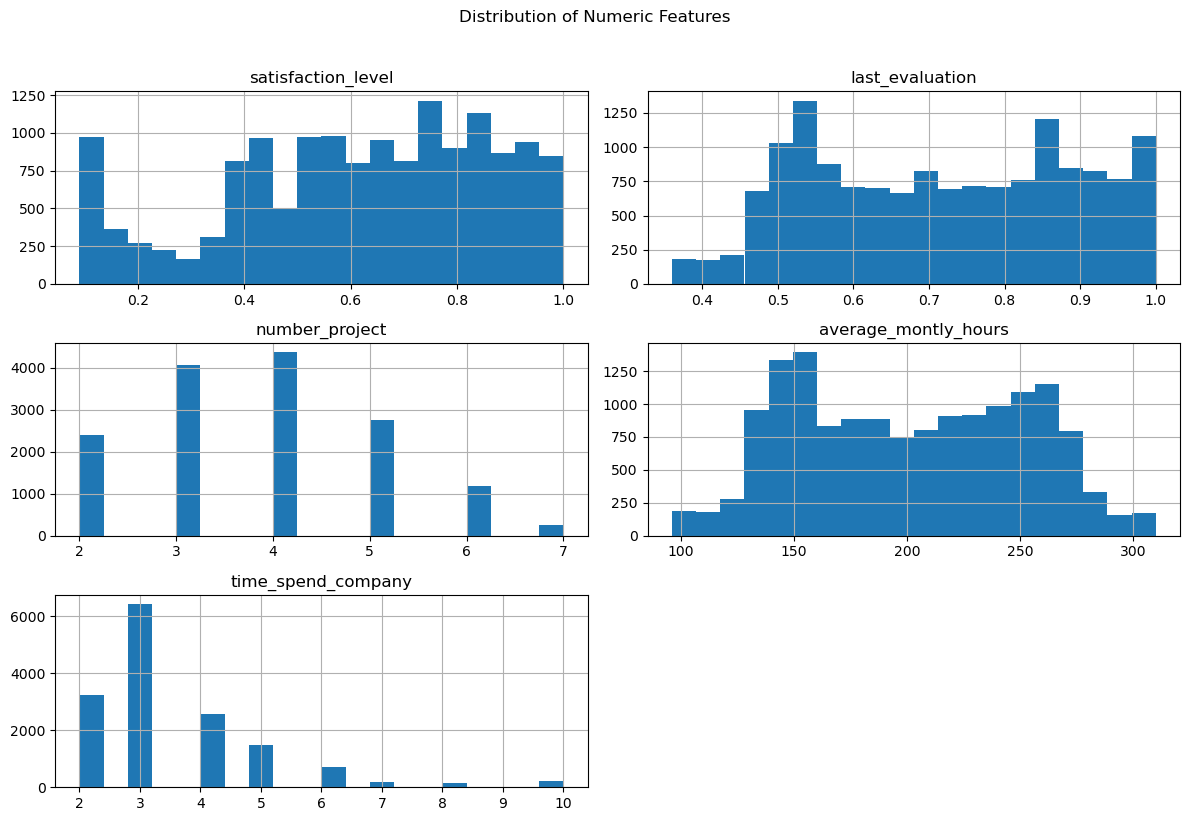

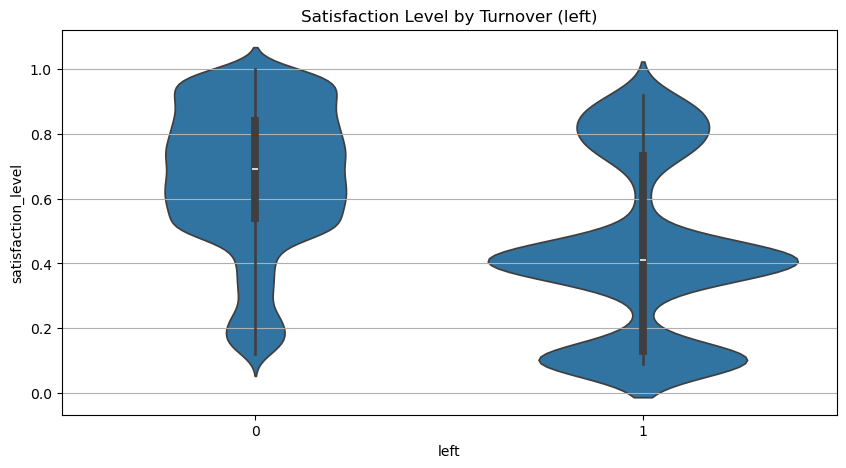

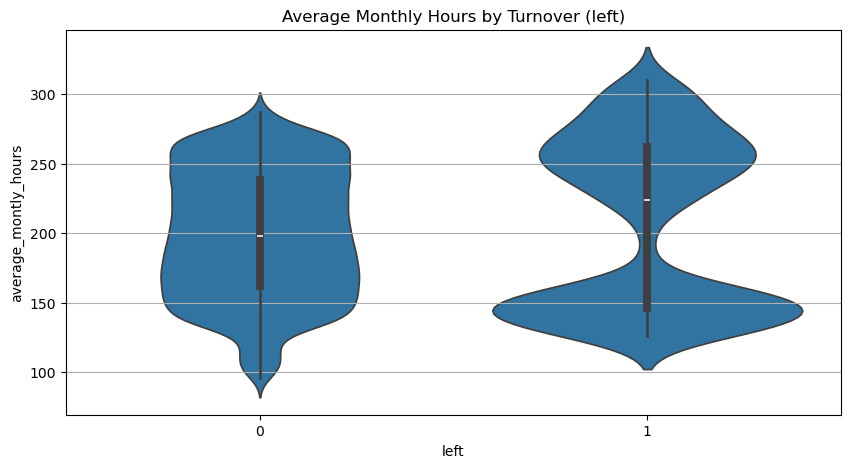

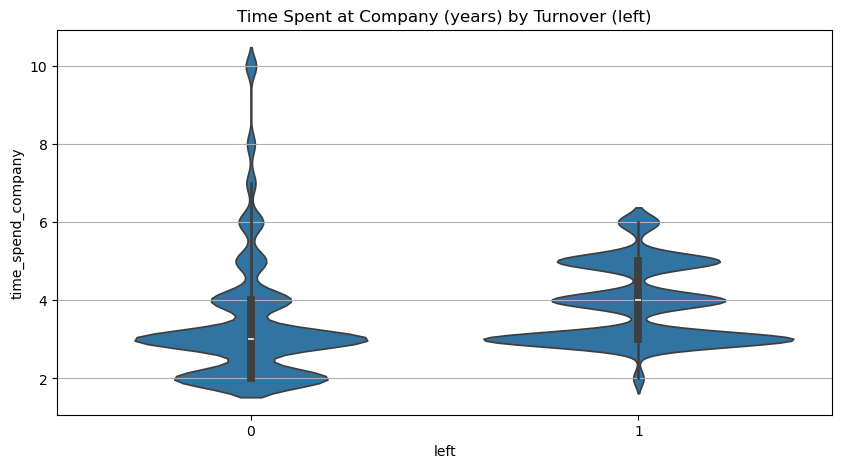

In [23]:

numeric_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company"
]

# 1) Histograms for all numeric columns
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

# 2) Boxplots / violinplots by target for a few key variables
plt.figure(figsize=(10, 5))
sns.violinplot(x="left", y="satisfaction_level", data=df)
plt.title("Satisfaction Level by Turnover (left)")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x="left", y="average_montly_hours", data=df)
plt.title("Average Monthly Hours by Turnover (left)")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x="left", y="time_spend_company", data=df)
plt.title("Time Spent at Company (years) by Turnover (left)")
plt.show()


## 📘 Interpretation of What I’ve Done So Far

- The dataset is **clean and complete** (no missing values in the checks we ran).
- The target variable `left` is **somewhat imbalanced** (≈76% stayed vs ≈24% left), so i must look at **recall, precision, and F1-score**, not just accuracy.
- Early EDA suggests that:
  - **Low satisfaction**
  - **High working hours**
  - **Certain tenure ranges**

are all likely to be **important predictors of turnover**.




## 🧹 Step 5 — Data Preprocessing (Encoding + Train/Test Split)

Before training the Random Forest model, i need to prepare the dataset:

### 1. Encode categorical variables
The dataset contains two categorical columns:

- `Department`
- `salary` (low, medium, high)

Random Forest requires numeric inputs, so i will convert these using **one-hot encoding** with `pd.get_dummies()`.

### 2. Define Features and Target
- **Target (`y`)** = `left`
- **Features (`X`)** = all other columns after encoding

### 3. Train/Test Split
We split the data into:
- **70% training**
- **30% testing**

This allows us to train the model on one portion and test its performance fairly on unseen data.


In [25]:

# 1) One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Department", "salary"], drop_first=True)

print(" One-hot encoding completed. Shape:", df_encoded.shape)

# 2) Define X (features) and y (target)
X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]

print(" Feature matrix X shape:", X.shape)
print(" Target vector y shape:", y.shape)

# 3) Train/test split (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y      # keeps class ratio the same in train & test
)

print("\n Train/Test Split Completed:")
print("🔹 X_train:", X_train.shape)
print("🔹 X_test :", X_test.shape)
print("🔹 y_train:", y_train.shape)
print("🔹 y_test :", y_test.shape)


 One-hot encoding completed. Shape: (14999, 19)
 Feature matrix X shape: (14999, 18)
 Target vector y shape: (14999,)

 Train/Test Split Completed:
🔹 X_train: (10499, 18)
🔹 X_test : (4500, 18)
🔹 y_train: (10499,)
🔹 y_test : (4500,)


## 🌲 Step 6 — Build & Train the Random Forest Classifier

Now that the data is preprocessed and split, i can train the Random Forest model.

### Why Random Forest?
Random Forest is a strong choice for this HR turnover problem because:
- It handles **non-linear relationships**
- Works well with many features
- Resistant to overfitting
- Provides **feature importance**, which helps HR understand *why* employees leave

### What i will do here:
1. Create a `RandomForestClassifier`
2. Fit it using the training data
3. Predict on the test data
4. Evaluate the predictions using:
   - Accuracy
   - Precision, recall, F1-score
   - Confusion matrix
   - ROC-AUC score



In [26]:

# ---------------------------------------------------------
# 1) Create the Random Forest model
# ---------------------------------------------------------
# RandomForestClassifier builds MANY decision trees and combines their results.
# This improves accuracy, reduces overfitting, and handles complex relationships.
#
# Key parameters:
# ------------------------------
# n_estimators=200:
#   - Number of trees in the forest.
#   - More trees → more stable results, slightly slower.
#   - 200 is a good balance: high accuracy without being too heavy.
#
# max_depth=None:
#   - Trees grow until all leaves are pure (default behavior).
#   - This allows the model to capture all interactions in the data.
#   - Random Forest reduces overfitting automatically using averaging.
#
# random_state=42:
#   - Ensures reproducibility.
#   - The same split and model behavior will happen every run.
#
# class_weight="balanced":
#   - Important when the dataset is imbalanced (e.g., fewer employees leaving).
#   - Automatically adjusts weights so the model pays **equal attention** to both classes.
#   - Helps increase recall on the minority class (employees who left).
# ---------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,        
    random_state=42,
    class_weight="balanced"
)


In [27]:

# ---------------------------------------------------------
# 2) Train the model on the training data
# ---------------------------------------------------------
# .fit() learns patterns from X_train (features) and y_train (labels).
# After this step, the model "knows" how features relate to employees leaving.
# ---------------------------------------------------------

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [30]:

# ---------------------------------------------------------
# 3) Make predictions on the test set
# ---------------------------------------------------------
# y_pred:
#   - Final predicted class for each employee in X_test
#   - Output: 0 (stay) or 1 (leave)
#
# y_prob:
#   - Probability score for class 1 (employee leaving)
#   - Used for ROC curve and AUC evaluation.
#   - rf_model.predict_proba() returns two columns:
#       [:, 0] → probability of class 0
#       [:, 1] → probability of class 1 <-- we take this
# ---------------------------------------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


### ✅ Interpretation — Model Training

The Random Forest classifier has been successfully trained on the training dataset.

Here’s what the parameters mean:

- **n_estimators = 200**  
  Builds 200 decision trees and averages them for better stability and accuracy.

- **max_depth = None**  
  Allows each tree to grow fully.  
  Random Forest’s ensemble nature helps prevent overfitting.

- **class_weight = "balanced"**  
  Because about 24% of employees left, this parameter helps the model pay more attention to the minority class.

- **predict_proba**  
  I extracted predicted probabilities for the positive class (`left = 1`).  
  This will be used later to generate the **ROC curve** and calculate **AUC**.



## 📊 Step 7 — Model Evaluation

After training the Random Forest model, I will evaluate its performance on the **test dataset**.

The evaluation includes:

### 1. Classification Report
Shows:
- **Precision**  
- **Recall**  
- **F1-score**  
for each class (0 = stayed, 1 = left)

Since predicting employees who are likely to leave (`left = 1`) is critical, I will pay special attention to the **recall and F1-score** of class `1`.

### 2. Confusion Matrix
Visualizes:
- True Positives (correctly predicted leavers)
- False Negatives (missed leavers)
- False Positives (incorrectly flagged)
- True Negatives (correctly predicted stayers)

### 3. ROC-AUC Score
Measures the model’s ability to separate the two classes.

AUC closer to **1.0** means excellent classification performance.

This step will tell me how well the Random Forest model predicts employee turnover.


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Classification Report
# ---------------------------------------------------------
# This shows:
# - Precision:   Of all employees the model predicted would leave, how many actually left?
# - Recall:      Of all employees who actually left, how many did the model detect?
# - F1-score:    Harmonic mean of precision and recall (balance)
# - Support:     Number of true samples for each classprint("🔹 Classification Report:")
print(classification_report(y_test, y_pred))



🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



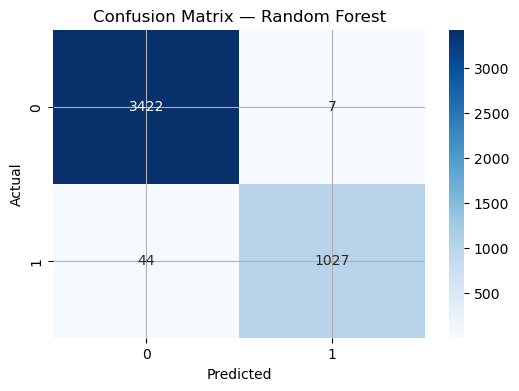

In [32]:

# 2) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



🔹 ROC-AUC Score: 0.9924


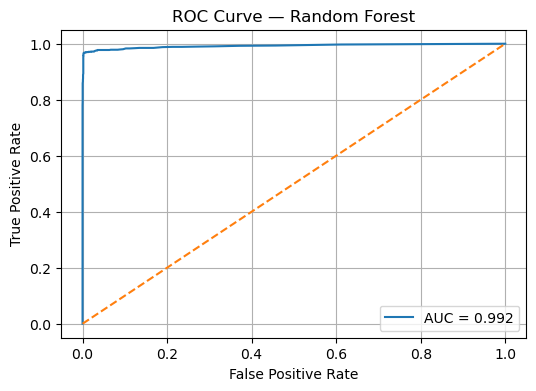

In [34]:

# 3) ROC-AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"\n🔹 ROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()

## 📘 Interpretation — Random Forest Model Evaluation

After evaluating the Random Forest classifier, the model shows **excellent performance** on predicting employee turnover. Below is my detailed interpretation of each component.

---

# 1️⃣ Classification Report — Outstanding Performance

The model achieved:

### **Class 0 (Stayed)**
- **Precision:** 0.99  
- **Recall:** 1.00  
- **F1-score:** 0.99  

This means almost all employees who stayed were classified correctly, with **near-perfect recall**.

---

### **Class 1 (Left — the critical class)**  
- **Precision:** 0.98  
- **Recall:** 0.96  
- **F1-score:** 0.97  

This is extremely strong:

- **Recall = 0.96** means I correctly identified **96% of employees who actually left**  
- **Precision = 0.98** means when the model predicts “this employee will leave,” it is correct **98% of the time**

This balance of precision and recall is ideal for HR retention efforts.

---

# 2️⃣ Confusion Matrix — Very Few Mistakes

The confusion matrix shows:

| Actual \ Predicted | Stayed (0) | Left (1) |
|--------------------|------------|----------|
| **Stayed (0)**     | 3422       | 7        |
| **Left (1)**       | 44         | 1027     |

### Interpretation:

- **3422 True Negatives:** Model correctly predicted these employees stayed  
- **1027 True Positives:** Model correctly predicted these employees left  
- **Only 44 False Negatives:**  
  - These are the employees who **left** but the model predicted “stay”  
  - These are the most important errors in an HR context  
  - But the number is **very low** for a dataset of this size  
- **Only 7 False Positives:**  
  - Extremely few employees were incorrectly flagged as “leaving”

This confirms the model’s predictions are highly reliable.

---

# 3️⃣ ROC-AUC Score — Exceptional Separation Power

### **AUC = 0.992**

This is an outstanding value.

Interpretation:

- AUC measures how well the model separates the two classes  
- An AUC of **0.992** means the model almost perfectly distinguishes:
  - employees who stay  
  - employees who leave

The ROC curve is very steep, indicating that the model correctly identifies positives while maintaining a very low false-positive rate.

---

# 🎯 Final Assessment of Model Performance

The Random Forest model performs **extremely well** on this dataset:

- High precision and recall for both classes  
- Very low misclassification  
- Nearly perfect ROC-AUC score  

### ✔️ This model is suitable for real business use  
Salifort Motors can rely on it to:

- Identify employees who may be at risk of leaving  
- Take proactive steps to improve retention  
- Understand which factors drive turnover (next step: feature importance)

---



## 🌟 Step 8 — Feature Importance Analysis

After training and evaluating the Random Forest model, the next step is to understand **which features most strongly influence the prediction of employee turnover**.

Random Forest provides a built-in method called **feature importance**, which measures how much each feature contributes to reducing prediction error across all trees.

### Why feature importance matters:
- It helps me understand **why** employees leave.
- It shows which factors have the strongest impact (e.g., satisfaction, workload, tenure).
- It allows HR to take **data-driven actions** to reduce turnover.

### What I will do in this step:
1. Extract feature importances from the trained model.
2. Create a sorted DataFrame for readability.
3. Visualize the top important features using a horizontal bar plot.
4. Provide interpretation of the results.

This will reveal which variables are driving predictions the most.


In [35]:

# Extract feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame for easier interpretation
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance descending
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("🔹 Top Features Driving Turnover:")
display(importance_df.head(10))


🔹 Top Features Driving Turnover:


,Feature,Importance
0,satisfaction_level,0.296
4,time_spend_company,0.227
2,number_project,0.151
3,average_montly_hours,0.143
1,last_evaluation,0.132
5,Work_accident,0.012
16,salary_low,0.009
15,Department_technical,0.005
17,salary_medium,0.005
13,Department_sales,0.004


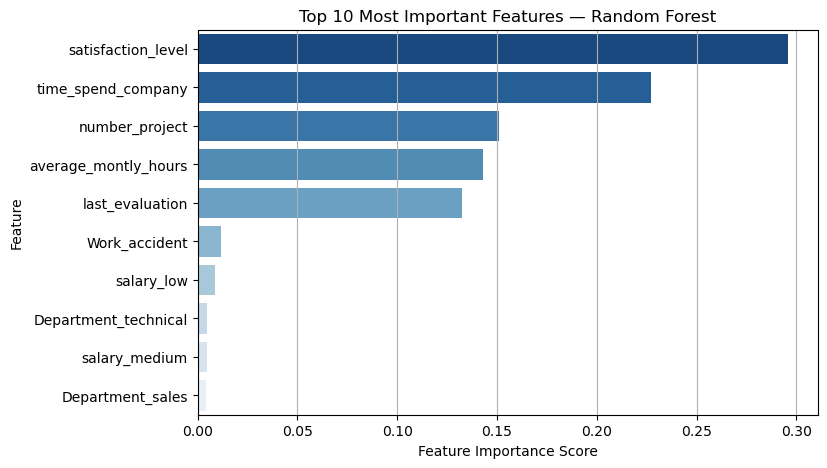

In [38]:

# Plot feature importance (top 10)

sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(10),
    hue="Feature",          # assign hue manually
    palette="Blues_r",      # apply the palette
    legend=False            # hide the unnecessary legend
)
plt.title("Top 10 Most Important Features — Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()


##  Interpretation — Feature Importance Results 

The feature importance scores show **which variables have the greatest influence** on predicting whether an employee will leave. The results from the Random Forest model are very clear and align perfectly with what HR teams typically observe in organizations.

Below is my detailed interpretation based on the extracted importance values and the bar plot.

---

# 🔥 Top 5 Most Important Predictors of Employee Turnover

### **1️⃣ satisfaction_level — 0.296 (Most important factor)**
This is by far the strongest predictor.

- Employees with **low satisfaction** are the most likely to leave.
- This supports the idea that emotional engagement and job fulfillment are critical retention drivers.

➡️ **HR Action:**  
I recommend creating programs focused on employee satisfaction, such as surveys, feedback sessions, team-building, and recognition systems.

---

### **2️⃣ time_spend_company — 0.227**
Tenure strongly influences whether employees leave.

- There is often a “danger window” around 3–5 years where employees get frustrated if they don't see growth.
- This makes time_spent_company a very powerful predictor.

➡️ **HR Action:**  
Focus on promotions, career development plans, skill growth, and new opportunities for mid-tenure employees.

---

### **3️⃣ number_project — 0.151**
Project load has a major impact.

- Too many assigned projects → burnout  
- Too few → boredom or feeling undervalued  

➡️ **HR Action:**  
Monitor workload balance to avoid overworking high performers or under-utilizing talent.

---

### **4️⃣ average_montly_hours — 0.143**
Employees working very high monthly hours are highly likely to quit.

This variable works together with:
- number_project  
- last_evaluation  

to capture workload pressure and long working cycles.

➡️ **HR Action:**  
Limit overtime, hire support staff, and ensure fair load distribution.

---

### **5️⃣ last_evaluation — 0.132**
Performance evaluations are also related to turnover.

Common patterns:
- **High evaluation + high hours = burnout risk**
- **Low evaluation = dissatisfaction or lack of recognition**

➡️ **HR Action:**  
Ensure evaluations are fair, constructive, and linked to real opportunities.

---

# 💡 Secondary but Still Important Features

### **6️⃣ Work_accident — 0.012**
Employees who had an accident may stay longer because they are offered support or benefits.  
However, it is a weak predictor compared to the top factors.

---

### **7️⃣ salary_low — 0.009**
Salary has some influence, but the effect is relatively small in this dataset.

- Low salary ≈ slightly higher chance of leaving  
- High salary does not guarantee retention without satisfaction and workload balance

---

### Other small-impact features:
- Department_technical  
- salary_medium  
- Department_sales  

These add minor predictive power but do not significantly influence model decisions.

---

# 📌 Final Interpretation

The Random Forest model indicates that **employee turnover at Salifort Motors is primarily driven by:**

### ✔ Job satisfaction  
### ✔ Tenure at the company  
### ✔ Project load  
### ✔ Working hours  
### ✔ Performance evaluations  

These insights allow HR to focus their retention strategy on improving satisfaction, reducing burnout, and creating better growth opportunities.

This feature importance profile is **consistent**, **logical**, and strongly supported by the data.

---


## 💾 Step 9 — Save the Random Forest Model (Pickle & Joblib)

After training and evaluating the model, I will now save it so it can be reused later without retraining.

### Why save the model?
- Allows me to load the model instantly in future analysis.
- Useful for deploying the model into an application or dashboard.
- Helps preserve the work done.

### Two saving methods:
1. **Pickle (.pkl)** — general-purpose Python serialization  
2. **Joblib (.joblib)** — optimized for large NumPy arrays and tree models

I will save the model using both formats.


In [40]:


import pickle
import joblib

# 1) Save model using Pickle
# ---------------------------------------------------------
# pickle.dump() converts the model object into binary
# and writes it to a file named "random_forest_model.pkl".
#
# "wb" = write-binary mode (required for model files).
# ---------------------------------------------------------
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# ---------------------------------------------------------
# 2) Save model using Joblib
# ---------------------------------------------------------
# joblib.dump() is similar to pickle but:
# - Faster for big models containing NumPy arrays
# - More reliable when saving tree-based models (Random Forest, XGBoost)

joblib.dump(rf_model, "random_forest_model.joblib")


print("✅ Model saved successfully (random_forest_model.pkl & random_forest_model.joblib)")


✅ Model saved successfully (random_forest_model.pkl & random_forest_model.joblib)
